# Affinity Propagation

## Load Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Single 10x2500 2

In [ ]:
raw_data = pd.read_csv("single_agent_data_10_2500_2.csv")
raw_data = raw_data[[
    "Mode",
    "Connectivity", 
    "MaxAlphaDist", 
    "MinBetaDist", 
    "Acceleration",
    "Speed",]] # affinity prop, mean shift, birch
raw_data.head()

### Single 10x1500 1

In [ ]:
raw_data = pd.read_csv("single_agent_data_10_1500.csv")
raw_data = raw_data[[
    "Mode",
    "Connectivity", 
    "MaxAlphaDist", 
    "MinBetaDist", 
    "Acceleration",
    "Speed",]] 
raw_data.head()

,Mode,Connectivity,MaxAlphaDist,MinBetaDist,Acceleration,Speed
0,2.0,2,4.430800,16.0,200.0,3.000000
1,2.0,2,4.520503,16.0,200.0,5.998205
2,2.0,2,4.700202,16.0,200.0,8.997602
3,2.0,2,4.969895,16.0,200.0,11.997303
4,3.0,2,5.329582,16.0,200.0,14.991228


### All 10x1500 1

In [ ]:
raw_data = pd.read_csv("all_comb_10_1500.csv")
raw_data = raw_data[[
    "Mode",
    "Connectivity", 
    "MaxAlphaDist", 
    "MinBetaDist", 
    "Acceleration",
    "Speed",]] 
raw_data.head()

,Mode,Connectivity,MaxAlphaDist,MinBetaDist,Acceleration,Speed
0,3.0,0,7.295402,16.0,200.0,3.0
1,3.0,0,7.713751,16.0,200.0,3.0
2,2.0,0,8.332839,16.0,200.0,3.0
3,2.0,2,4.430800,16.0,200.0,3.0
4,3.0,0,16.000000,16.0,200.0,3.0


## Process Data

In [ ]:
# Separate data and labels
labels = raw_data["Mode"]
raw_data = raw_data.iloc[:, -(raw_data.shape[1] - 1):]
data = StandardScaler().fit_transform(raw_data)

# Convert to np arr
labels = labels.to_numpy()

# Check data params
(n_steps, n_features), n_modes = data.shape, np.unique(labels).size
print(f"# modes: {n_modes}; # steps: {n_steps}; # features: {n_features}")

# modes: 4; # steps: 59960; # features: 5


In [ ]:
# Save a df version of data
df = pd.DataFrame(data)
# Transpose for Hopkins
df = df.T

In [ ]:
Processing = "Unscaled"
Descriptor = "Agent"
Filename = "./Plots"

## PCA Visualisation

In [ ]:
from sklearn.decomposition import PCA

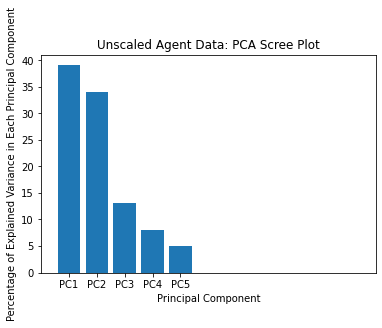

,PC1,PC2,PC3,PC4,PC5
0,-0.221438,-0.146203,-1.801082,-1.337265,-0.078309
1,-0.296361,-0.133588,-1.802741,-1.251633,-0.116751
2,-0.407234,-0.114919,-1.805197,-1.124912,-0.173638
3,0.577016,-0.224596,-1.757361,-1.605863,0.337675
4,-1.780359,0.116284,-1.835609,0.444481,-0.878169


In [ ]:
df_T = df.T

pca = PCA() # create a PCA object
pca.fit(df_T) # do the math
pca_data = pca.transform(df_T) # get PCA coordinates for scaled_data

#turn pca_data into a dataframe and add filendf_T = df.Tames as the index
PCA_labels = ['PC' + str(x) for x in range(1, len(pca_data[1])+1)]
pca_df = pd.DataFrame(pca_data, index=df.columns, columns=PCA_labels)


# Draw a scree plot
 
#The following code constructs the Scree plot
#plt.rcParams['figure.figsize'] = [15, 10]
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=0)
PCA_labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=PCA_labels)
plt.ylabel('Percentage of Explained Variance in Each Principal Component')
plt.xlabel('Principal Component')
plt.xlim(0,12)
plt.title('{} {} Data: PCA Scree Plot'.format("Unscaled", "Agent"))
#plt.savefig('Plots\{} 03 - {} -  PCA Scree Plot.png'.format(Filename, Processing), bbox_inches='tight')
plt.show()

pca_df.head()

### Plot PC1 vs PC2

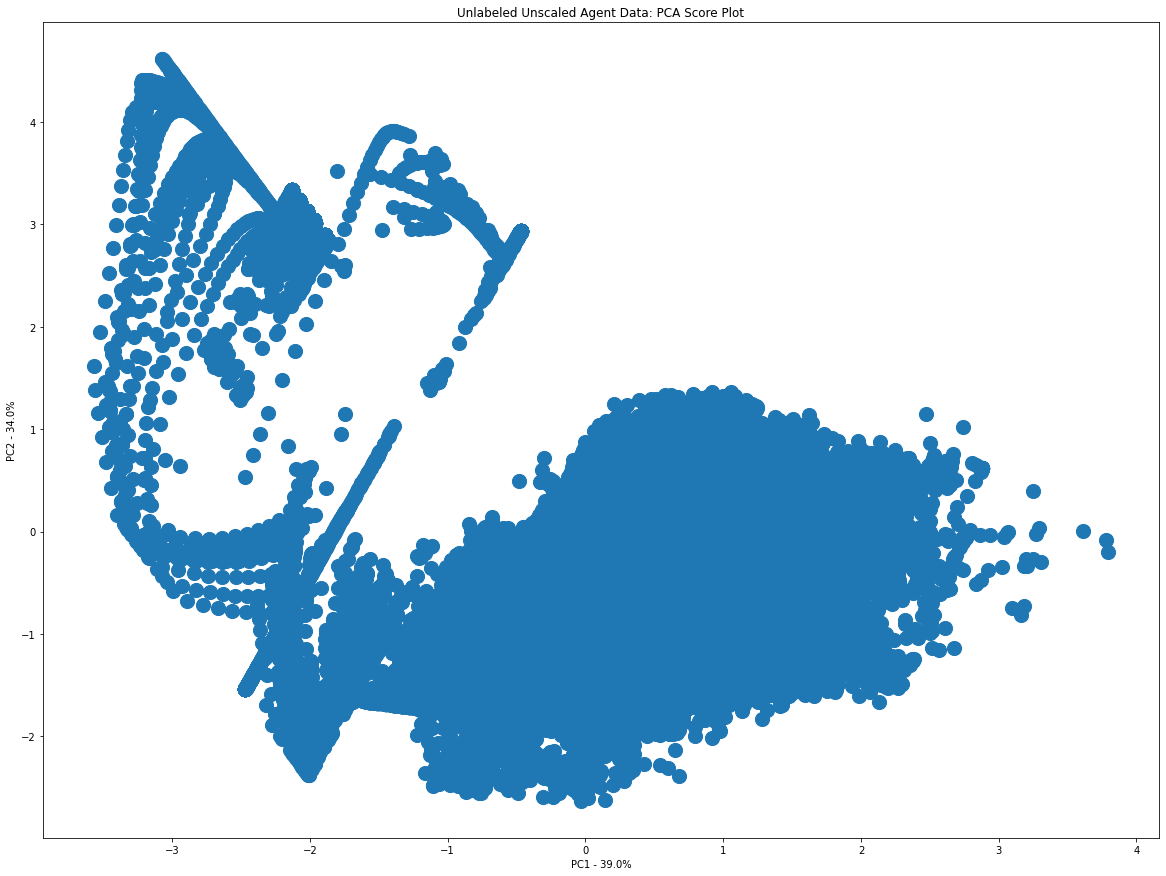

In [ ]:
#pca_df = pd.DataFrame(pca_data, columns=labels) #makes pca_data into a dataframe with index PC1, PC2 etc from 'labels'
plt.rcParams['figure.figsize'] = [20,15]  
plt.scatter(pca_df.PC1, pca_df.PC2, s=200)
plt.title('Unlabeled {} {} Data: PCA Score Plot'.format(Processing, Descriptor))
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]), size=10)
#plt.savefig('Plots\{} 04 - {} - PC1vsPC2 PCA Score Plot.png'.format(Filename, Processing), bbox_inches='tight')
plt.show()

## Plot with Ground Truth Labels

No handles with labels found to put in legend.


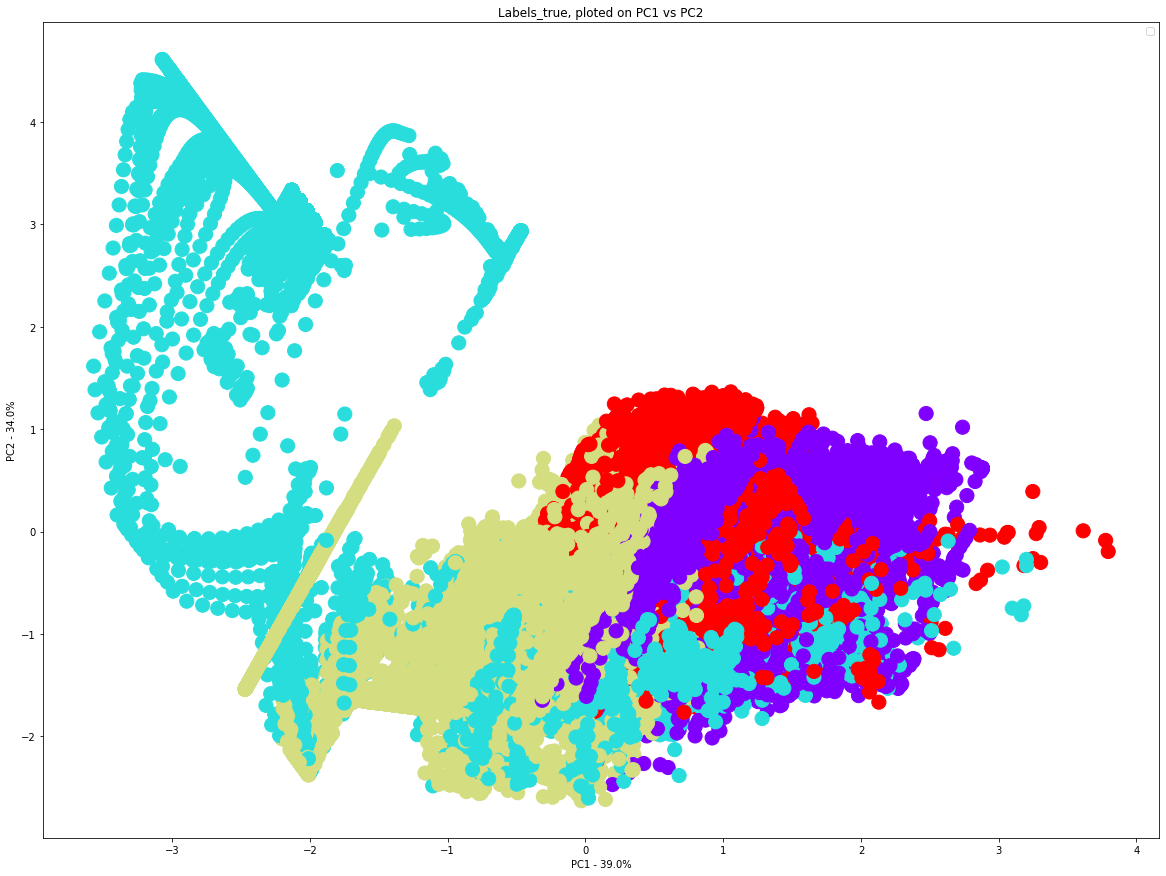

In [ ]:
plt.scatter(pca_df.PC1,pca_df.PC2, c=labels, cmap='rainbow', s=[200])
plt.rcParams['figure.figsize'] = [20, 15]  
plt.title('Labels_true, ploted on PC1 vs PC2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.legend()
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]), size=10)
# plt.savefig('Plots7\{} 11 - {} PCA1-2 Hierarchical {} Clusters.png'.format(Filename, Processing, cluster.n_clusters), bbox_inches='tight')
plt.show()

## Clustering

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
import matplotlib.cm as cm

In [ ]:
# Use affinity to estimate number of clusters
preference = -6 * np.square(df_T.max().max() - df_T.min().min())
damping = 0.95
affinity = AffinityPropagation(
      preference=preference, 
      damping=damping).fit(df_T)#, {'preference':-5.0, 'damping':0.95}
affinity 
labels_aff=affinity.labels_
print('Estimated number of clusters:', ((len(set(labels_aff)) - (1 if -1 in labels_aff else 0))))

# Run metrics
print("Silhouette Coefficient: %0.6f" % metrics.silhouette_score(df_T, labels_aff))
print("Davies Bouldine Index: %0.6f" % davies_bouldin_score(df_T, labels_aff))  

print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels, labels_aff))
print("Completeness: %0.6f" % metrics.completeness_score(labels, labels_aff))
print("V-measure: %0.6f" % metrics.v_measure_score(labels, labels_aff))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels, labels_aff))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels, labels_aff))

# Plot
plt.scatter(pca_df.PC1,pca_df.PC2,s=[200],  c=labels_aff, cmap='rainbow') 
plt.rcParams['figure.figsize'] = [20, 15]  
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.title("Aff Prop on model based features | pref {} damp {}".format(preference, damping))

# plt.title('Axis 1 Scaled: Affinity Propagation Clusters of {} PCA data, ploted on PC1 vs PC2'.format(Filename))
plt.show()

In [ ]:
affinity.cluster_centers_